In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('./cc_scaled')
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,1
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0,0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,2
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0,2
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,2
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0


In [4]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
LABELS                              0
dtype: int64

<AxesSubplot:>

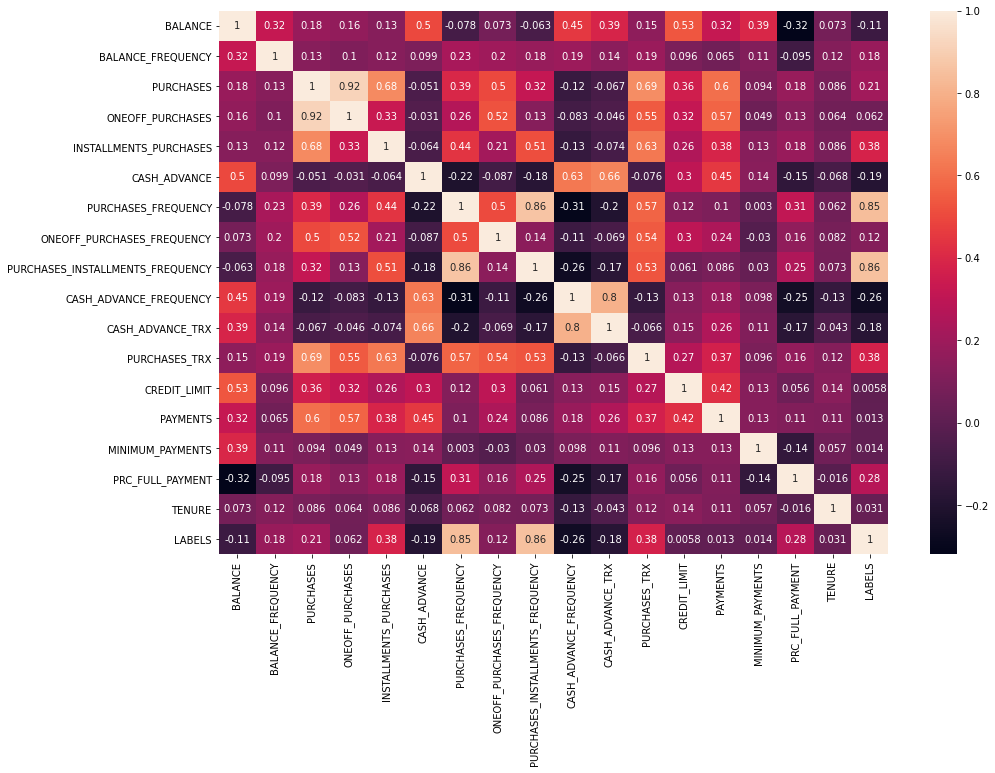

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
X = df.drop('LABELS', axis=1)
y = df['LABELS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
RF = RandomForestClassifier(n_estimators=15, random_state=35)
RF.fit(X_train, y_train)
ypred = RF.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,ypred))

Accuracy: 0.9910614525139665


In [14]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,ypred))
print (metrics.classification_report(y_test, ypred))
print("-------------------------------------------------------------")


Confusion Matrix:
 [[932   0   5]
 [  2 290   4]
 [  3   2 552]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.98      0.99       296
           2       0.98      0.99      0.99       557

    accuracy                           0.99      1790
   macro avg       0.99      0.99      0.99      1790
weighted avg       0.99      0.99      0.99      1790

-------------------------------------------------------------


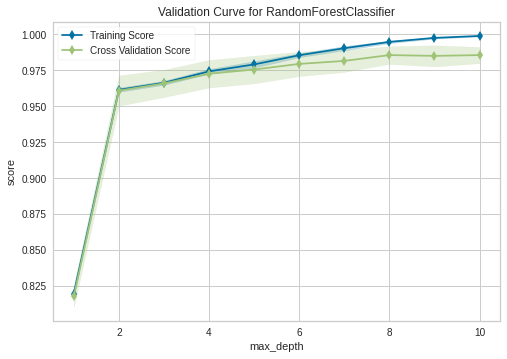

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20,
                estimator=RandomForestClassifier(n_estimators=15,
                                                 random_state=35),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [15]:
from yellowbrick.model_selection import validation_curve
print(validation_curve(RF, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

In [17]:
import pickle
pickle.dump(RF, open('./classifier_model.pkl','wb'))

In [18]:
RF.predict([[0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,
             0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0]])

array([0])

In [19]:
RF.predict([[0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,
             0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0]])

array([1])

In [20]:
RF.predict([[1,2,3,4,2,3,1,5,1,3,2,1,5,6,2,1,1]])

array([1])

In [23]:
RF.predict([[0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,
             0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0]])

array([2])